## Homework 7: Advanced Data Analysis 

#### Exercises

#### The regression results tend to generate residuals that are correlated with the dependent variable. This indicates that the regression is missing an explanatory variable that better captures the magnitude of changes in RGDP. Find a variable that improves prediction of RGDP per capita. Rerun all results presented in the panel regression section with this variable included.

Some of you have asked if Homework 7 is due this weekend. You have learned the skills you need to complete the 1 homework problem in the assignment. If you prefer, you may run a standard OLS regression instead of a Panel OLS. The important thing is that you find another data set to include in the regression to see if the addition of the variable would help normalize the errors. If you are unable to normalize the errors, explain why you think the additional variable did not accomplish this goal.

In [3]:
## Import the GDP data from Madison project 
#multiIndex.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# index_col = [0,2] will select  countrycode as the primary index and year as 
# the secondary index
data = pd.read_excel("mpd2018.xlsx", 
                     sheet_name = "Full data", 
                     index_col = [0,2])


In [4]:
data

country  cgdppc  rgdpnapc      pop         i_cig i_bm
countrycode year                                                           
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN  NaN
            1870  Afghanistan     NaN       NaN   4207.0           NaN  NaN
            1913  Afghanistan     NaN       NaN   5730.0           NaN  NaN
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated  NaN
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated  NaN
...                       ...     ...       ...      ...           ...  ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0  Extrapolated  NaN
            2013     Zimbabwe  1801.0    1604.0  13183.0  Extrapolated  NaN
            2014     Zimbabwe  1797.0    1594.0  13772.0  Extrapolated  NaN
            2015     Zimbabwe  1759.0    1560.0  14230.0  Extrapolated  NaN
            2016     Zimbabwe  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 6 columns]

In [5]:
data.index

MultiIndex([('AFG', 1820),
            ('AFG', 1870),
            ('AFG', 1913),
            ('AFG', 1950),
            ('AFG', 1951),
            ('AFG', 1952),
            ('AFG', 1953),
            ('AFG', 1954),
            ('AFG', 1955),
            ('AFG', 1956),
            ...
            ('ZWE', 2007),
            ('ZWE', 2008),
            ('ZWE', 2009),
            ('ZWE', 2010),
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016)],
           names=['countrycode', 'year'], length=19873)

In [6]:
data.index.get_level_values("year")

Int64Index([1820, 1870, 1913, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=19873)

Since we don’t need to hold every repeated year value, only the full range years present in the data set. We will remove an repeated values from the list and then ensure that the list is in order:

In [7]:
# to gather all of the years, we group observations by year, 
# which will remove the other column of the multiindex 
years = data.groupby("year").mean().index

In [8]:
years

Int64Index([   1,  730, 1000, 1150, 1280, 1281, 1282, 1283, 1284, 1285,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=741)

In [9]:
# pairs of countries to compare in plots
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("USA","GBR", "ESP", "MEX")]
linestyles = ["-", ":","--","-."]

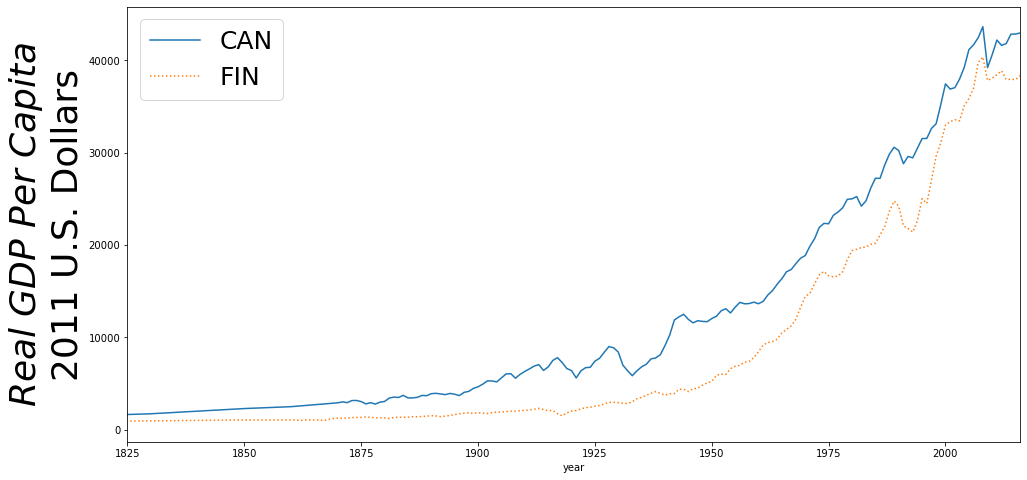

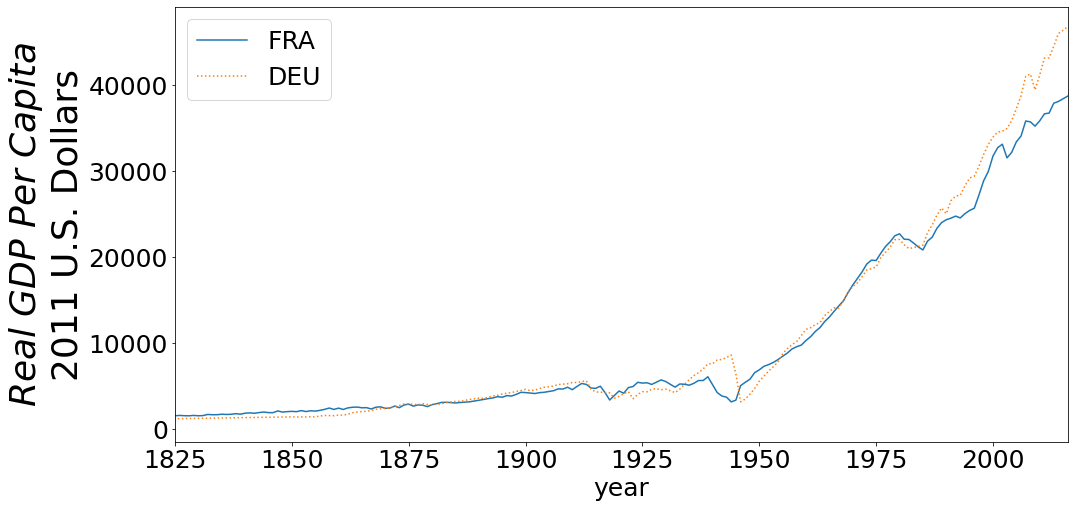

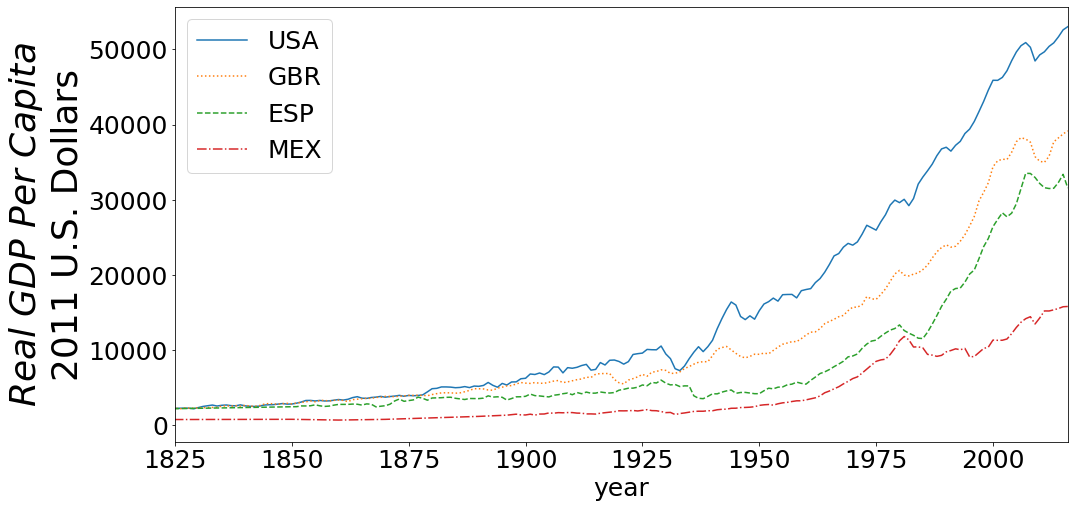

In [10]:
#multiIndex.py
# . . .
  
for pair in pairs:  
    fig, ax = plt.subplots(figsize=(16,8))  
    for i in range(len(pair)):  
        country = pair[i]  
        linestyle = linestyles[i]  
        data.loc[country,:]["cgdppc"].dropna(
        ).plot.line(ax = ax,  
               label = country, linestyle = linestyle)  
    plt.xlim([1825, max(years)])
    plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})  
    plt.rcParams.update({"font.size": 25})  
    plt.ylabel(
        "$Real$ $GDP$ $Per$ $Capita$\n2011 U.S. Dollars",
        fontsize=36)  
    plt.legend()  
    plt.show()  
    plt.close()  

#### Merge Data Sets with Double Index

Next, we will import both sets of data as unique objects with the intention of combining them. First, we must successful import the Fraser Index. Unlike with other files we have imported, the column names are in the third row and the years are in the second column. Finally, we will call the .dropna() method twice to drop any row (axis = 0) and then any column (axis=1) with missing observations: